In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import glob
import os
import datetime
from datetime import timedelta, datetime
import scipy
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import io
%matplotlib inline
import timeit
from timeit import default_timer as timer
from matplotlib import pyplot
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from functools import reduce
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection


In [3]:
colnames = ["VDS_ID","Lane Count","Loop Count"]

for i in range(1,11):
    colnames.append('Loop_{}_FLOW'.format(i))
    colnames.append('Loop_{}_Occupancy'.format(i))
    colnames.append('Loop_{}_status'.format(i))

health_data_day2 = pd.read_csv('Good_Data_30thSept.csv',sep = ',')
health_data_US101S_day2 = health_data_day2.loc[health_data_day2['Fwy'] == 'US101-S']
health_data_US101S_day2 = health_data_US101S_day2.drop_duplicates(subset=['VDS'],keep = 'last')
health_data_US101S_day2 = health_data_US101S_day2.reset_index(drop = True)

In [215]:
health_data_US101S_day2.head()

Fwy CA PM     VDS            Name       County Type  Lane  Status  \
0  US101-S   .45  773062    GAREY STREET  Los Angeles   ML   4.0       0   
1  US101-S   .64  776328  LOS ANGELES ST  Los Angeles   ML   4.0       0   
2  US101-S     1  776751    FIRST STREET  Los Angeles   ML   3.0       0   
3  US101-S  1.08  773024        BROADWAY  Los Angeles   ML   4.0       0   
4  US101-S  1.83  764853        N OF 110  Los Angeles   ML   5.0       0   

     Recv'd  Occ=0  Flow=0  HighOcc  HighFlow  Flow=0Occ>0  Occ=0Flow>0  \
0  2,039.00   8.00       8      0.0         0            0            0   
1  2,036.00   7.00      10      6.0         0            3            0   
2  1,737.00  30.00      30      0.0         0            0            0   
3  2,037.00   6.00       8      4.0         0            2            0   
4  2,033.00   0.00       0      1.0         5            0            0   

   RptOcc  
0     0.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0

In [4]:
li_lstm = []
li_groups = []
li_complete_groups = []
day1 = pd.DataFrame()
def pre_processing_lstm(day):
    global li_lstm
    global li_groups
    global li_complete_groups
    global day1 
    path = r'C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\\' + day + '\\'
    
    all_files = glob.glob(path + "/*.txt")
    for filename in all_files:
        #if  int(filename[-10:-8]) >= 5 and int(filename[-10:-8]) <=21:        
        df = pd.read_csv(filename,index_col = None, delimiter = ",",names = colnames ,skiprows = 1)
        df= df.drop(['Lane Count','Loop Count','Loop_1_status','Loop_8_status','Loop_2_status','Loop_3_status',
                         'Loop_4_status','Loop_5_status','Loop_6_status','Loop_7_status','Loop_8_status','Loop_9_status',
                         'Loop_10_status'],axis = 1)
        df['time'] = datetime.strptime(str(int(filename[-18:-4])),'%Y%m%d%H%M%S')
        li_lstm.append(df)
    li_lstm = [df.loc[df['VDS_ID'].isin(health_data_US101S_day2.VDS.values)] for df in li_lstm]
    day1 = pd.concat(li_lstm)
    return day1

day1 = str(input())
start = timer()
pre_processing_lstm(day1)
end = timer()
print(end-start)
print(day1.shape)


li_lstm = []
li_groups = []
li_complete_groups = []
day2 = pd.DataFrame()
def pre_processing_lstm(day):
    global li_lstm
    global li_groups
    global li_complete_groups
    global day2 
    path = r'C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\\' + day + '\\'
    
    all_files = glob.glob(path + "/*.txt")
    for filename in all_files:
        #if  int(filename[-10:-8]) >= 5 and int(filename[-10:-8]) <=21:        
        df = pd.read_csv(filename,index_col = None, delimiter = ",",names = colnames ,skiprows = 1)
        df= df.drop(['Lane Count','Loop Count','Loop_1_status','Loop_8_status','Loop_2_status','Loop_3_status',
                         'Loop_4_status','Loop_5_status','Loop_6_status','Loop_7_status','Loop_8_status','Loop_9_status',
                         'Loop_10_status'],axis = 1)
        df['time'] = datetime.strptime(str(int(filename[-18:-4])),'%Y%m%d%H%M%S')
        li_lstm.append(df)
    li_lstm = [df.loc[df['VDS_ID'].isin(health_data_US101S_day2.VDS.values)] for df in li_lstm]
    day2 = pd.concat(li_lstm)
    return day2

day2 = str(input())
start = timer()
pre_processing_lstm(day2)
end = timer()
print(end-start)
print(day2.shape)

20190929
54.22165878799999
(235624, 22)
20190930
55.96023281699999
(236182, 22)


In [219]:
 path = r'C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\\' + '20190930' + '\\' 
all_files = glob.glob(path + "/*.txt")
len(all_files)

2875

In [220]:
i = int(input())

lstm_data_day1 = day1.loc[day1['VDS_ID']==i]
lstm_data_day1 = lstm_data_day1.set_index('time')
lstm_data_day1 = lstm_data_day1[['Loop_1_FLOW']]

lstm_data_day2 = day2.loc[day2['VDS_ID']==i]
lstm_data_day2 = lstm_data_day2.set_index('time')
lstm_data_day2 = lstm_data_day2[['Loop_1_FLOW']]

print(lstm_data_day1.head())
print(lstm_data_day2.head())

lstm_data = pd.concat([lstm_data_day1,lstm_data_day2])
print(lstm_data.head())

716331
                     Loop_1_FLOW
time                            
2019-09-29 00:00:00         11.0
2019-09-29 00:00:30          8.0
2019-09-29 00:01:00          7.0
2019-09-29 00:01:30         12.0
2019-09-29 00:02:00          7.0
                     Loop_1_FLOW
time                            
2019-09-30 00:00:00         11.0
2019-09-30 00:00:30         11.0
2019-09-30 00:01:00          6.0
2019-09-30 00:01:30          5.0
2019-09-30 00:02:00          5.0
                     Loop_1_FLOW
time                            
2019-09-29 00:00:00         11.0
2019-09-29 00:00:30          8.0
2019-09-29 00:01:00          7.0
2019-09-29 00:01:30         12.0
2019-09-29 00:02:00          7.0


In [221]:
lstm_data.shape

(5721, 1)

In [222]:
### This cell is for LSTM training with more data (More historical data)
### Training sets
train = lstm_data.values[0:4000,:]
valid = lstm_data.values[4000:,:]

print(train.shape)
print(valid.shape)

### Scaling between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data.values)

### Splits & Creating a data-structure with 30 timesteps and 1 output
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
    
### Converting lists to array
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping to get the required input shape (3D tensor with shape (batch size,timesteps,input_dim))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# # create and fit the LSTM network

# ## Initializing the RNN
model = Sequential()

# ## Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# ## Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a Fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# ## Adding the output layer
model.add(Dense(1))

# ## Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(1,6):
    start = timer()
    #### Fitting the RNN to the training set
    model.fit(x_train, y_train, epochs=i, batch_size=30, verbose=2)
    ### Creating a data structure for test data
    inputs = lstm_data[len(lstm_data) - len(valid) - 30:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for j in range(30,inputs.shape[0]):
        X_test.append(inputs[j-30:j,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    traffic_flow = model.predict(X_test)
    traffic_flow = scaler.inverse_transform(traffic_flow)
    end = timer()
    rms=np.sqrt(np.mean(np.power((valid-traffic_flow),2)))
    print(f'Number of Epochs: {i} and time required :{end-start} seconds with RMSE: {rms}')

(4000, 1)
(1721, 1)
Epoch 1/1
 - 64s - loss: 0.0220
Number of Epochs: 1 and time required :87.59571559100004 seconds with RMSE: 2.1269535208941934
Epoch 1/2
 - 21s - loss: 0.0115
Epoch 2/2
 - 21s - loss: 0.0113
Number of Epochs: 2 and time required :43.36317794600109 seconds with RMSE: 2.1515448035991613
Epoch 1/3
 - 21s - loss: 0.0115
Epoch 2/3
 - 19s - loss: 0.0116
Epoch 3/3
 - 20s - loss: 0.0112
Number of Epochs: 3 and time required :61.39542674100085 seconds with RMSE: 2.1376890435510005
Epoch 1/4
 - 20s - loss: 0.0112
Epoch 2/4
 - 20s - loss: 0.0110
Epoch 3/4
 - 21s - loss: 0.0116
Epoch 4/4
 - 22s - loss: 0.0111
Number of Epochs: 4 and time required :85.05152957999962 seconds with RMSE: 2.1993192420162204
Epoch 1/5
 - 20s - loss: 0.0111
Epoch 2/5
 - 21s - loss: 0.0112
Epoch 3/5
 - 19s - loss: 0.0109
Epoch 4/5
 - 20s - loss: 0.0109
Epoch 5/5
 - 21s - loss: 0.0109
Number of Epochs: 5 and time required :102.70530463199975 seconds with RMSE: 2.088225433094222


In [125]:
### This cell is for averaging the forecast obtained from LSTM training with more data
### This cell is for LSTM training with more data (More historical data)
### Training sets
train = lstm_data.values[0:4000,:]
valid = lstm_data.values[4000:,:]

print(train.shape)
print(valid.shape)

### Scaling between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data.values)

### Splits & Creating a data-structure with 60 timesteps and 1 output
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
    
### Converting lists to array
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping to get the required input shape (3D tensor with shape (batch size,timesteps,input_dim))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# # create and fit the LSTM network

# ## Initializing the RNN
model = Sequential()

# ## Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# ## Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a Fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# ## Adding the output layer
model.add(Dense(1))

# ## Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')
N1 = day2.loc[day2['VDS_ID']==716328]
N1 = N1.set_index('time')
N1 = N1[['Loop_2_FLOW']][1100:]

N2 = day2.loc[day2['VDS_ID']==764853]
N2 = N2.set_index('time')
N2 = N2[['Loop_1_FLOW']][1100:]

N3 = day2.loc[day2['VDS_ID']==717446]
N3 = N3.set_index('time')
N3 = N3[['Loop_2_FLOW']][1100:]

N4 = day2.loc[day2['VDS_ID']==716331]
N4 = N4.set_index('time')
N4 = N4[['Loop_1_FLOW']][1100:]

N5 = day2.loc[day2['VDS_ID']==716328]
N5 = N5.set_index('time')
N5 = N5[['Loop_3_FLOW']][1100:]

for i in range(5,6):
    start = timer()
    #### Fitting the RNN to the training set
    model.fit(x_train, y_train, epochs=i, batch_size=30, verbose=2)
    ### Creating a data structure for test data
    inputs = lstm_data[len(lstm_data) - len(valid) - 30:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for j in range(30,inputs.shape[0]):
        X_test.append(inputs[j-30:j,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    traffic_flow = model.predict(X_test)
    traffic_flow = scaler.inverse_transform(traffic_flow)
    LSTM_forecast = pd.DataFrame(traffic_flow)
    LSTM_forecast.index = lstm_data[4000:].index
    Li_ = [LSTM_forecast,N1,N2,N3,N4,N5]
    df_final = reduce(lambda left,right: pd.merge(left,right,on='time'), Li_)
    df_final.columns = ['Forecast', 'N1', 'N2', 'N3', 'N4','N5']
    df_final['avg'] = df_final.mean(axis=1)
    end = timer()
    rms=np.sqrt(np.mean(np.power((df_final['Forecast']-df_final['avg']),2)))
    print(f'Number of Epochs: {i} and time required :{end-start} seconds with RMSE: {rms} - Averaging the Forecast')

(4000, 1)
(1738, 1)
Epoch 1/5
 - 29s - loss: 0.0282
Epoch 2/5
 - 10s - loss: 0.0156
Epoch 3/5
 - 10s - loss: 0.0156
Epoch 4/5
 - 11s - loss: 0.0154
Epoch 5/5
 - 10s - loss: 0.0156
Number of Epochs: 5 and time required :82.43657624900152 seconds with RMSE: 1.3902097395855983 - Averaging the Forecast


In [126]:
#### This cell is for LSTM training with data of the same day
train = lstm_data_day2.values[0:1100,:]
valid = lstm_data_day2.values[1100:,:]

print(train.shape)
print(valid.shape)

### Scaling between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data_day2.values)

### Splits & Creating a data-structure with 60 timesteps and 1 output
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
    
### Converting lists to array
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping to get the required input shape (3D tensor with shape (batch size,timesteps,input_dim))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# # create and fit the LSTM network

# ## Initializing the RNN
model = Sequential()

# ## Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# ## Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a Fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# ## Adding the output layer
model.add(Dense(1))

# ## Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(5,6):
    start = timer()
    #### Fitting the RNN to the training set
    model.fit(x_train, y_train, epochs=i, batch_size=30, verbose=2)
    ### Creating a data structure for test data
    inputs = lstm_data_day2[len(lstm_data_day2) - len(valid) - 30:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for j in range(30,inputs.shape[0]):
        X_test.append(inputs[j-30:j,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    traffic_flow = model.predict(X_test)
    traffic_flow = scaler.inverse_transform(traffic_flow)
    end = timer()
    rms=np.sqrt(np.mean(np.power((valid-traffic_flow),2)))
    print(f'Number of Epochs: {i} and time required :{end-start} seconds with RMSE: {rms}')

(1100, 1)
(1773, 1)
Epoch 1/5
 - 16s - loss: 0.0556
Epoch 2/5
 - 3s - loss: 0.0157
Epoch 3/5
 - 3s - loss: 0.0148
Epoch 4/5
 - 3s - loss: 0.0145
Epoch 5/5
 - 3s - loss: 0.0142
Number of Epochs: 5 and time required :38.33555111599708 seconds with RMSE: 2.725885894543334


In [132]:
### This cell is for averaging the forecast obtained from LSTM training with data from the same day
train = lstm_data_day2.values[0:1100,:]
valid = lstm_data_day2.values[1100:,:]

print(train.shape)
print(valid.shape)

### Scaling between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data_day2.values)

### Splits & Creating a data-structure with 60 timesteps and 1 output
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
    
### Converting lists to array
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping to get the required input shape (3D tensor with shape (batch size,timesteps,input_dim))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# # create and fit the LSTM network

# ## Initializing the RNN
model = Sequential()

# ## Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# ## Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a Fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# ## Adding the output layer
model.add(Dense(1))

# ## Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')
N1 = day2.loc[day2['VDS_ID']==716328]
N1 = N1.set_index('time')
N1 = N1[['Loop_2_FLOW']][1100:]

N2 = day2.loc[day2['VDS_ID']==764853]
N2 = N2.set_index('time')
N2 = N2[['Loop_1_FLOW']][1100:]

N3 = day2.loc[day2['VDS_ID']==717446]
N3 = N3.set_index('time')
N3 = N3[['Loop_2_FLOW']][1100:]

N4 = day2.loc[day2['VDS_ID']==716331]
N4 = N4.set_index('time')
N4 = N4[['Loop_1_FLOW']][1100:]

N5 = day2.loc[day2['VDS_ID']==716328]
N5 = N5.set_index('time')
N5 = N5[['Loop_3_FLOW']][1100:]

for i in range(5,6):
    start = timer()
    #### Fitting the RNN to the training set
    model.fit(x_train, y_train, epochs=i, batch_size=30, verbose=2)
    ### Creating a data structure for test data
    inputs = lstm_data[len(lstm_data) - len(valid) - 30:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for j in range(30,inputs.shape[0]):
        X_test.append(inputs[j-30:j,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    traffic_flow = model.predict(X_test)
    traffic_flow = scaler.inverse_transform(traffic_flow)
    LSTM_forecast = pd.DataFrame(traffic_flow)
    LSTM_forecast.index = N1.index
    Li_ = [LSTM_forecast,N1,N2,N3,N4,N5]
    df_final = reduce(lambda left,right: pd.merge(left,right,on='time'), Li_)
    df_final.columns = ['Forecast', 'N1', 'N2', 'N3', 'N4','N5']
    df_final['avg'] = df_final.mean(axis=1)
    end = timer()
    rms=np.sqrt(np.mean(np.power((df_final['Forecast']-df_final['avg']),2)))
    print(f'Number of Epochs: {i} and time required :{end-start} seconds with RMSE: {rms} - Averaging the Forecast')

(1100, 1)
(1773, 1)
Epoch 1/5
 - 20s - loss: 0.0528
Epoch 2/5
 - 3s - loss: 0.0155
Epoch 3/5
 - 3s - loss: 0.0149
Epoch 4/5
 - 3s - loss: 0.0144
Epoch 5/5
 - 3s - loss: 0.0142
Number of Epochs: 5 and time required :43.77848620400255 seconds with RMSE: 1.4357393356263 - Averaging the Forecast


In [134]:
### This is for training the LSTM model with the help of data from the neighbors
### This is for getting the data of the neighbors and inner joining them to one dataframe
Corrupt = day2.loc[day2['VDS_ID']==716328]
Corrupt = Corrupt.set_index('time')
Corrupt = Corrupt[['Loop_1_FLOW']]

N1 = day2.loc[day2['VDS_ID']==716328]
N1 = N1.set_index('time')
N1 = N1[['Loop_2_FLOW']]

N2 = day2.loc[day2['VDS_ID']==764853]
N2 = N2.set_index('time')
N2 = N2[['Loop_1_FLOW']]

N3 = day2.loc[day2['VDS_ID']==717446]
N3 = N3.set_index('time')
N3 = N3[['Loop_2_FLOW']]

N4 = day2.loc[day2['VDS_ID']==716331]
N4 = N4.set_index('time')
N4 = N4[['Loop_1_FLOW']]

N5 = day2.loc[day2['VDS_ID']==716328]
N5 = N5.set_index('time')
N5 = N5[['Loop_3_FLOW']]

Li_ = [Corrupt,N1,N2,N3,N4,N5]

df_final = reduce(lambda left,right: pd.merge(left,right,on='time'), Li_)
df_final.head()

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = df_final.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
for i in range(5,6):
    # split into train and test sets
    values = reframed.values
    n_train_periods = 1100
    train = values[:n_train_periods, :]
    test = values[n_train_periods:, :]
    #split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]# reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    start = timer()
    history = model.fit(train_X, train_y, epochs=i, batch_size=30, verbose=2)
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    
    #invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    end = timer()
    #calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print(f'Number of Epochs: {i} and time required :{end-start} seconds with RMSE: {rmse} - Training with Neighbors')

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.333333   0.416667    0.28125   0.478261   0.500000   0.363636  0.190476
2   0.190476   0.166667    0.34375   0.478261   0.500000   0.227273  0.428571
3   0.428571   0.666667    0.31250   0.260870   0.272727   0.500000  0.523810
4   0.523810   0.541667    0.31250   0.217391   0.227273   0.363636  0.333333
5   0.333333   0.416667    0.15625   0.217391   0.227273   0.409091  0.333333
Epoch 1/5
 - 21s - loss: 0.1599
Epoch 2/5
 - 1s - loss: 0.0378
Epoch 3/5
 - 1s - loss: 0.0206
Epoch 4/5
 - 1s - loss: 0.0150
Epoch 5/5
 - 1s - loss: 0.0143
Number of Epochs: 5 and time required :40.01882768699943 seconds with RMSE: 2.6074837780865714 - Training with Neighbors


In [211]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis

C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis


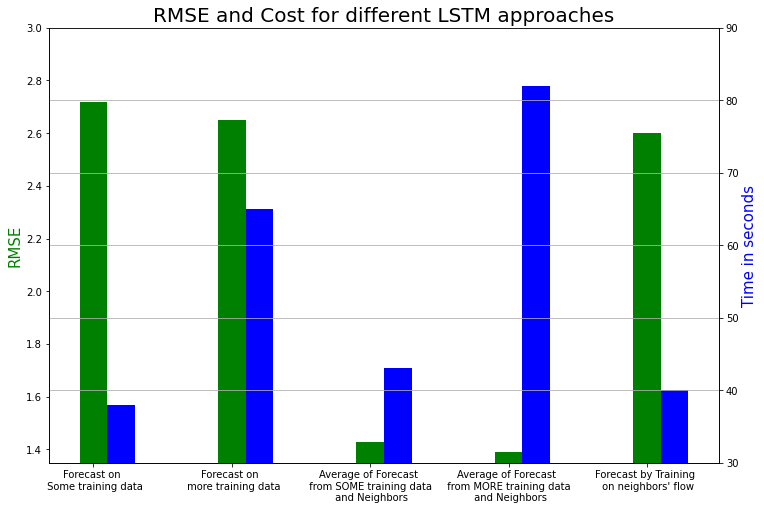

In [214]:
bars = ('Forecast on \n Some training data','Forecast on \n more training data',
        'Average of Forecast \n from SOME training data \n and Neighbors',
        'Average of Forecast \n from MORE training data \n and Neighbors',
        "Forecast by Training \n on neighbors' flow")
y_pos = np.arange(len(bars))
RMSE = [2.72,2.65,1.43,1.39,2.60]
Time = [38,65,43,82,40]


fig, ax1 = plt.subplots(figsize=(12,8),linewidth=5)
ax2 = ax1.twinx()
ax1.bar(y_pos,RMSE,width = 0.2,color = 'g')
ax2.bar(y_pos+0.2,Time,width = 0.2,color ='b')


plt.xticks(y_pos, bars,fontsize = 18)
ax2.set_ylabel('Time in seconds',fontsize = 15,color = 'b')
ax2.set_ylim(30,90)

ax1.set_ylabel('RMSE',fontsize = 15,color = 'g')
ax1.set_ylim(1.35,3)



plt.title('RMSE and Cost for different LSTM approaches',fontsize = 20)



plt.grid()

plt.savefig('LSTM Methodologies.png')